In [2]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D
import datetime
import warnings
warnings.simplefilter('ignore')

with open('SHB_5yr_transect_coastalalg.pkl','rb') as f:  # Python 3: open(..., 'rb')
    SHB_lat_trans,SHB_cdom_trans,SHB_s275_trans,SHB_wkly_dates = pickle.load(f)  
    
berg_river = pd.read_csv('verified---river-flow-(-g1h013_-berg-@-drieheuvels-)_5yr.csv')
berg_river['monitoring_period'] = pd.to_datetime(berg_river['monitoring_period'])

misv_dam = pd.read_csv('Surface Water Storage ( Misverstand Dam )-Latest data as at_ 04-Aug-2024.csv')

misv_dam['DateTime'] = pd.to_datetime(misv_dam['DateTime'])
perc_misv = ~np.isnan(misv_dam['High'])

# Estimate DOC from relationship between CDOM and S275
SHB_doc_trans = SHB_cdom_trans / (np.exp(-0.9616792894543756 - 134.20243910397406* SHB_s275_trans))

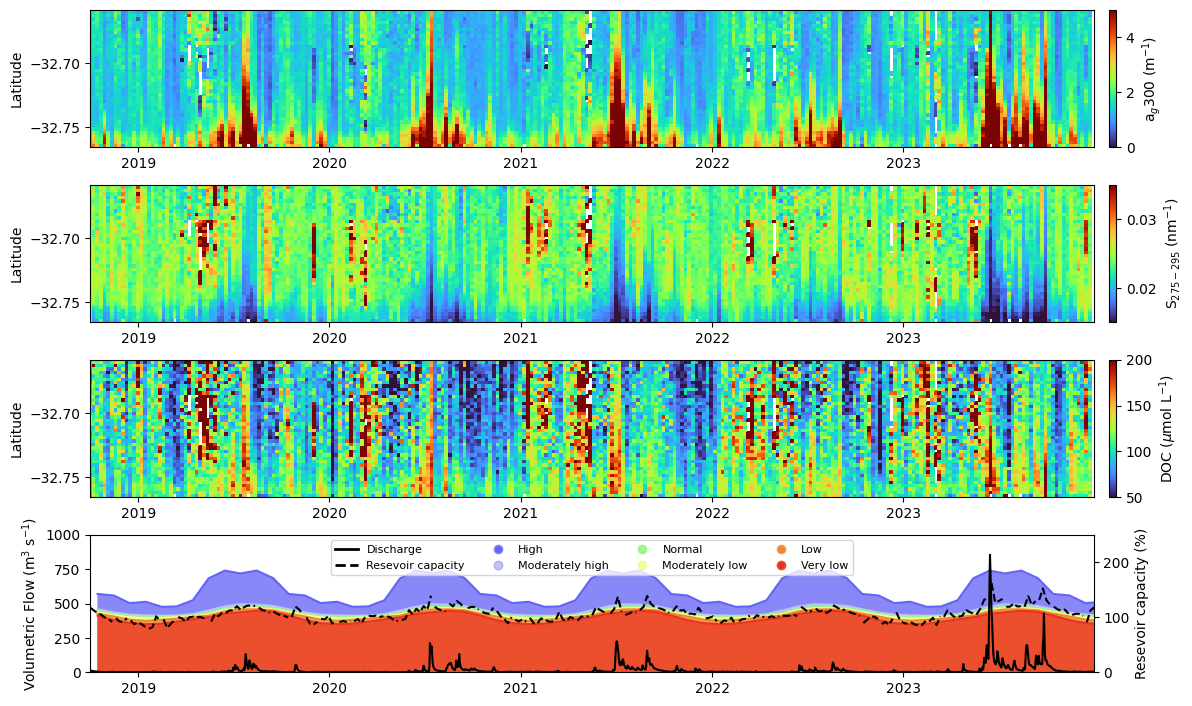

In [3]:
fig, ax = plt.subplots(ncols = 1, nrows = 4, figsize=(12,7),layout = "compressed")

# aCDOM
vmin = 0
vmax = 5
a0 = ax[0].pcolor(SHB_wkly_dates,SHB_lat_trans,SHB_cdom_trans, cmap='turbo', vmin=vmin, vmax=vmax, shading = 'auto')

cbar = fig.colorbar(a0, orientation="vertical", pad = -0.04)
cbar.set_label('a$_{g}$300 (m$^{-1}$)', fontsize=10)

ax[0].set_ylabel('Latitude')
ax[0].set_xlim([datetime.date(2018, 10, 1), datetime.date(2023, 12, 31)])

#S275-295
vmin = 0.015
vmax = 0.035
a1= ax[1].pcolor(SHB_wkly_dates,SHB_lat_trans,SHB_s275_trans, cmap='turbo', vmin=vmin, vmax=vmax, shading = 'auto')

cbar = fig.colorbar(a1, orientation="vertical", pad = -0.04)
cbar.set_label('S$_{275-295}$ (nm$^{-1}$)', fontsize=10)

ax[1].set_ylabel('Latitude')
ax[1].set_xlim([datetime.date(2018, 10, 1), datetime.date(2023, 12, 31)])

#DOC
vmin = 50
vmax = 200
a2= ax[2].pcolor(SHB_wkly_dates,SHB_lat_trans,SHB_doc_trans, cmap='turbo', vmin=vmin, vmax=vmax, shading = 'auto')

cbar = fig.colorbar(a2, orientation="vertical", pad = -0.04)
cbar.set_label('DOC ($\mu$mol L$^{-1}$)', fontsize=10)

ax[2].set_ylabel('Latitude')
ax[2].set_xlim([datetime.date(2018, 10, 1), datetime.date(2023, 12, 31)])



ax4 = ax[3].twinx()


ax4.plot(misv_dam['DateTime'][perc_misv],misv_dam['High'][perc_misv],color = '#6464F6')
ax4.fill_between(misv_dam['DateTime'][perc_misv],misv_dam['High'][perc_misv],color = '#8888F8')

ax4.plot(misv_dam['DateTime'][perc_misv],misv_dam['Moderately_High'][perc_misv],color = '#C0C0FA')
ax4.fill_between(misv_dam['DateTime'][perc_misv],misv_dam['Moderately_High'][perc_misv],color = '#ACACF1')

ax4.plot(misv_dam['DateTime'][perc_misv],misv_dam['Normal'][perc_misv],color = '#9EF78C')
ax4.fill_between(misv_dam['DateTime'][perc_misv],misv_dam['Normal'][perc_misv],color = '#9EF78C')

ax4.plot(misv_dam['DateTime'][perc_misv],misv_dam['Moderately_Low'][perc_misv],color = '#FCFC90')
ax4.fill_between(misv_dam['DateTime'][perc_misv],misv_dam['Moderately_Low'][perc_misv],color = '#E8FA98')

ax4.plot(misv_dam['DateTime'][perc_misv],misv_dam['Low'][perc_misv],color = '#EF8733')
ax4.fill_between(misv_dam['DateTime'][perc_misv],misv_dam['Low'][perc_misv],color = '#EDA44C')

ax4.plot(misv_dam['DateTime'][perc_misv],misv_dam['Very_Low'][perc_misv],color = '#EA3323')
ax4.fill_between(misv_dam['DateTime'][perc_misv],misv_dam['Very_Low'][perc_misv],color = '#EB4F2E')


ax4.plot(misv_dam['DateTime'],misv_dam['rescap2324'],'--k')
ax4.set_xlim([datetime.date(2018, 10, 1), datetime.date(2023, 12, 31)])
ax4.set_ylabel('Resevoir capacity (%)')
ax4.set_ylim([0, 250])


ax[3].plot(berg_river['monitoring_period'],berg_river['River_Flow'],color = 'k')
ax[3].set_ylabel('Volumetric Flow (m$^{3}$ s$^{-1}$)')
# ax[1].text(datetime.date(2021, 1, 1),800, 'Berg River', fontsize = 15)

ax[3].set_ylim([0, 1000])

ax[3].set_xlim([datetime.date(2018, 10, 1), datetime.date(2023, 12, 31)])



ax[3].set_zorder(ax[3].get_zorder()+1)
ax[3].set_frame_on(False)

legend_elements = [Line2D([0], [0], color='k', lw=2, label='Discharge'),
                   Line2D([0], [0], color='k',linestyle='--', lw=2, label='Resevoir capacity'),
                   Line2D([0], [0], marker='o', markerfacecolor='#6464F6', markeredgecolor='#8888F8',linestyle = 'None', label='High'),
                   Line2D([0], [0], marker='o', markerfacecolor='#C0C0FA', markeredgecolor='#ACACF1',linestyle = 'None', label='Moderately high'),
                   Line2D([0], [0], marker='o', markerfacecolor='#9EF78C', markeredgecolor='#9EF78C',linestyle = 'None', label='Normal'),
                   Line2D([0], [0], marker='o', markerfacecolor='#FCFC90', markeredgecolor='#E8FA98',linestyle = 'None', label='Moderately low'),
                   Line2D([0], [0], marker='o', markerfacecolor='#EF8733', markeredgecolor='#EDA44C',linestyle = 'None', label='Low'),
                   Line2D([0], [0], marker='o', markerfacecolor='#EA3323', markeredgecolor='#EB4F2E',linestyle = 'None', label='Very low')]

                   
                #           markerfacecolor='white', markersize=12),
                #    Line2D([0], [0], marker='o', color='black', label='10/26',
                #           markerfacecolor='white', markersize=12),]

ax[3].legend(handles=legend_elements, loc='upper center', fontsize = "8",ncol=4)


In [41]:
np.exp(-0.8316934614626317)

0.4353114785601718